In [1]:
import sys
sys.path.append('../src')  # so notebook can find your script

from linear_regression import LinearRegression

In [2]:
import csv

class LinearRegression:
    def __init__(self):
        self.m = 0  # slope
        self.b = 0  # intercept

    def load_data(self, file_path):
        X = []
        Y = []
        with open(file_path, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # skip header
            for row in reader:
                x_val = float(row[0])
                y_val = float(row[1])
                X.append(x_val)
                Y.append(y_val)
        return X, Y
    def predict(self, x):
        return self.m * x + self.b

    def compute_cost(self, X, Y):
        total_error = 0
        n = len(X)
        for i in range(n):
            y_pred = self.predict(X[i])
            total_error += (Y[i] - y_pred) ** 2
        return total_error / n

    def fit(self, X, Y, learning_rate=0.0001, epochs=1000):
        n = len(X)
        for epoch in range(epochs):
            dm = 0
            db = 0
            for i in range(n):
                x = X[i]
                y = Y[i]
                y_pred = self.predict(x)
                error = y_pred - y
                dm += error * x
                db += error
            # update weights
            self.m -= (learning_rate * dm) / n
            self.b -= (learning_rate * db) / n

            if epoch % 100 == 0:
                cost = self.compute_cost(X, Y)
                print(f"Epoch {epoch}: Cost = {cost:.4f}, m = {self.m:.4f}, b = {self.b:.4f}")



In [3]:
model = LinearRegression()
X, Y = model.load_data('dataset.csv')  # adjust path if needed
print(f"Loaded {len(X)} points. Sample: x = {X[0]}, y = {Y[0]}")

Loaded 100 points. Sample: x = 35.79164483971844, y = 78.27920619934157


In [4]:
model = LinearRegression()
X, Y = model.load_data('dataset.csv')
model.fit(X, Y, learning_rate=0.0001, epochs=1000)

print(f"Final Model: y = {model.m:.2f}x + {model.b:.2f}")

Epoch 0: Cost = 6133.5788, m = 0.7348, b = 0.0106
Epoch 100: Cost = 37.9457, m = 2.0334, b = 0.0364
Epoch 200: Cost = 37.9353, m = 2.0333, b = 0.0436
Epoch 300: Cost = 37.9249, m = 2.0332, b = 0.0508
Epoch 400: Cost = 37.9145, m = 2.0331, b = 0.0580
Epoch 500: Cost = 37.9042, m = 2.0330, b = 0.0652
Epoch 600: Cost = 37.8939, m = 2.0329, b = 0.0723
Epoch 700: Cost = 37.8837, m = 2.0328, b = 0.0795
Epoch 800: Cost = 37.8736, m = 2.0327, b = 0.0866
Epoch 900: Cost = 37.8635, m = 2.0326, b = 0.0937
Final Model: y = 2.03x + 0.10


In [5]:
x_test = 50  # try any number
y_pred = model.predict(x_test)
print(f"Prediction for x = {x_test} → y = {y_pred:.2f}")

Prediction for x = 50 → y = 101.72


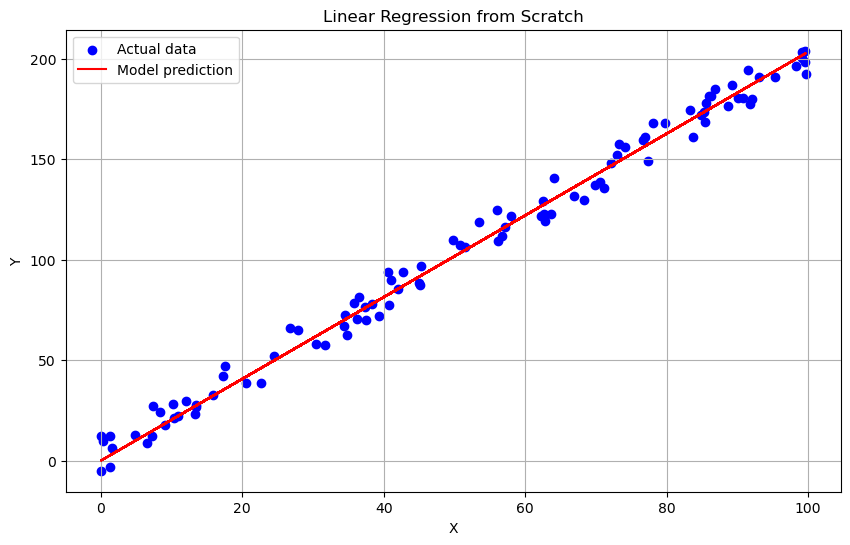

In [6]:
import matplotlib.pyplot as plt

# Predict y for every x (model's line)
y_preds = [model.predict(x) for x in X]

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, y_preds, color='red', label='Model prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression from Scratch')
plt.legend()
plt.grid(True)
plt.show()